# 시계열분해를 위한 이동평균

계절성분이 포함된 추세순환성분 추정하기 후 전통적인 분해방법인 decompose() 함수를 이이용하는 실습 예제입니다.

전통적인 분해방법은 가법과 승법 모형으로 구분됩니다. 여기에서 가법을 적용하여 분해하는 방법을 정리해보겠습니다.

1. 가장 먼저 주기 m(월별은 12, 분기는 4)을 바탕으로 추세성분 추정합니다. 마찬가지로 주기가 홀수인 경우엔 m\-MA를 따르며, 주기가 짝수인 경우엔 2m\-MA를 따릅니다.

2. 그렇게 추세조정된 T를 추정한 후 추세조정된 계열(추세성분이 제거된 계열을 말함)인 y\-T를 통해 주기별로 평균을 계산한 후,

3. 주기별 평균의 합이 0이 되도록 조정하여 계절성분 S을 추정합니다.

4. S까지 구하고 나면 y=T\+S\+R 을 따르므로 y\-T\-S는 R이 되게 됩니다.
다른 말로는 불규칙 성분만이 남게 됩니다.


승법의 경우 는 추세조정된 계열을 y/T로 구합니다. 3번 과저에서 주기별 평균의 합이 m이 되도록 조정하여 계절성분 S를 추정합니다.

불규칙한 성분을 추정하는 것 역시 빼기가 아닌 나누기로 R=y/(T\*S)로 정의됩니다.

Warning message:
"package 'fpp2' was built under R version 3.6.3"
Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Loading required package: forecast

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Warning message:
"package 'fma' was built under R version 3.6.3"
Loading required package: expsmooth

Warning message:
"package 'expsmooth' was built under R version 3.6.3"


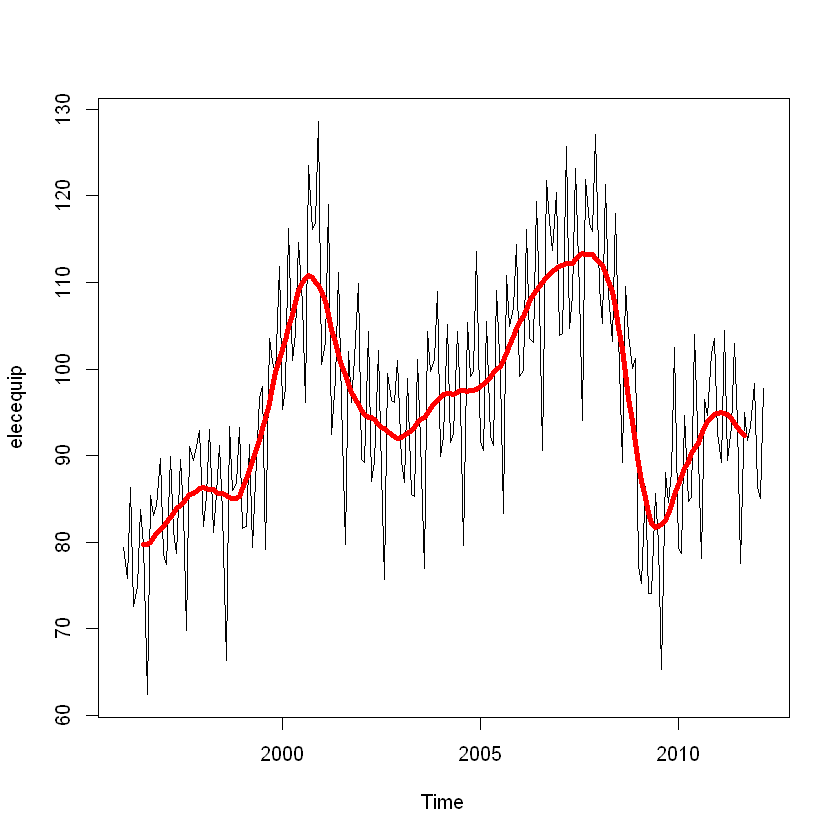

In [1]:
library(fpp2)

# step1
elecequip.ma <- ma(elecequip, 12)
plot(elecequip)
lines(elecequip.ma, col="red", lwd=4)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,NA,NA,NA,NA,NA,NA,79.75042,79.78917,80.00500,80.51375,81.03417,81.43083
1997,81.82958,82.29875,82.84333,83.34333,83.89125,84.30792,84.57458,85.04000,85.50083,85.62333,85.90583,86.26375
1998,86.32292,86.17125,86.12208,86.07000,85.74792,85.58958,85.59583,85.43458,85.21250,85.07167,85.05958,85.34333
1999,86.17625,87.31333,88.27083,89.32000,90.46792,91.76333,93.10542,94.34333,96.05125,97.98958,99.59833,101.06167
2000,102.21458,103.32375,104.86250,106.32792,107.69000,109.11792,110.03750,110.47667,110.81458,110.57750,110.00083,109.63333
2001,109.00875,107.84667,106.27042,104.54667,103.06583,101.63417,100.39250,99.35833,98.17125,97.33292,96.71500,95.95000
2002,95.24417,94.74250,94.46625,94.36750,94.16417,93.58292,93.20667,93.10083,92.77542,92.48542,92.25250,92.03833
2003,92.14708,92.35417,92.61042,92.95083,93.29333,93.83083,94.18667,94.43250,94.91458,95.42167,95.97458,96.41292
2004,96.73042,97.02250,97.17667,97.20000,97.12375,97.25958,97.52292,97.52542,97.47125,97.51667,97.48917,97.62875
2005,97.95125,98.23583,98.61708,99.08125,99.62583,99.96542,100.31375,101.01417,101.84417,102.75750,103.72208,104.64417


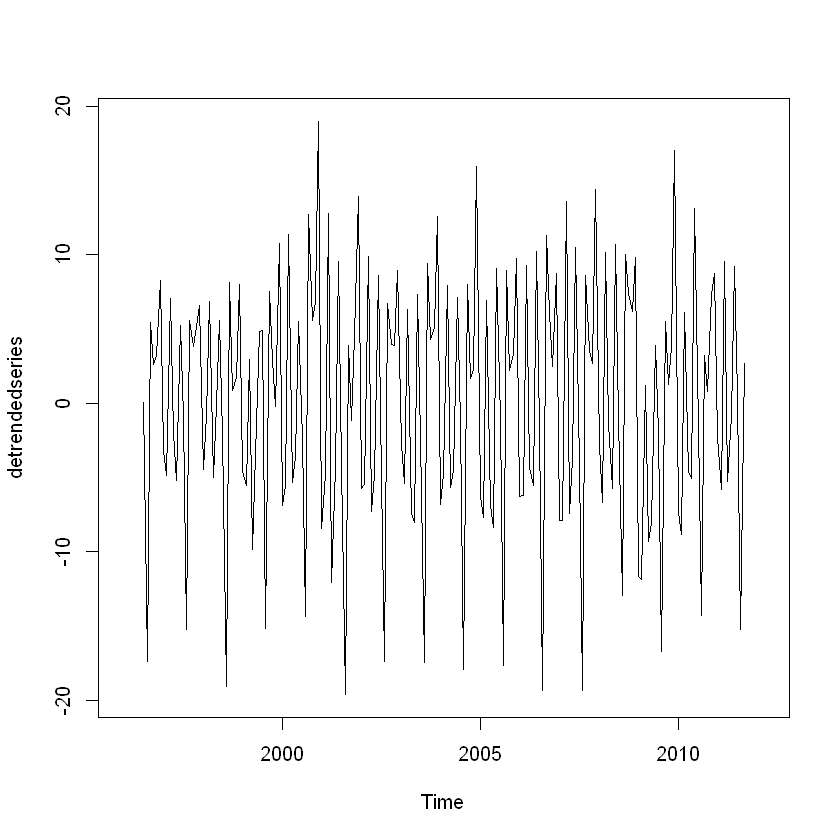

In [2]:
# step2 ~ step4
# 가법 모형 적용
elecequip.add <- decompose(elecequip, type="additive")

# 추세성분 추정
elecequip.add$trend

# 추세조정된 계열: y-T 측정
detrendedseries <- elecequip.add$x - elecequip.add$trend
plot(detrendedseries)


In [3]:
# step2 ~ step4
# 계절성분 추정
elecequip.add$seasonal

# 계절성분 주기별로 다 똑같은 값을 갖으니 그 대표값만 출력
elecequip.add$figure

# 불규칙한 성분 추정
elecequip.add$random

# 동일한 결과
elecequip.add$x-elecequip.add$trend-elecequip.add$seasonal


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
1997,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
1998,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
1999,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2000,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2001,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2002,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2003,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2004,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504
2005,-5.887662,-6.199273,8.083171,-6.314968,-4.818468,7.976088,-1.575338,-16.870416,7.304324,3.007671,3.847366,11.447504


[1]  -5.887662  -6.199273   8.083171  -6.314968  -4.818468   7.976088
 [7]  -1.575338 -16.870416   7.304324   3.007671   3.847366  11.447504

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,NA,NA,NA,NA,NA,NA,1.62492086,-0.50875101,-1.89932393,-0.41142115,-0.67153226,-3.17833782
1997,2.69807885,1.32052329,-1.06650448,4.24163440,-0.39278226,-2.77400448,0.67075420,1.63041565,-1.71515726,0.79899552,1.28680107,-4.84125448
1998,1.43474552,5.38802329,-1.22525448,1.33496774,4.71055107,-2.42567115,-0.56049580,-2.19416768,0.82317607,-2.14933782,-2.09694893,-3.49083782
1999,1.30141218,0.65593996,-5.11400448,-3.55503226,1.34055107,-3.13942115,6.45992086,1.65708232,0.20442607,-0.10725448,-4.04569893,-0.70917115
2000,-1.02692115,0.64552329,3.28432885,0.96705107,1.19846774,-2.45400448,-0.84216247,2.51374899,5.38109274,2.53482885,3.01180107,7.52916218
2001,-2.56108782,1.40260663,4.70641218,-5.77169893,0.50263440,1.52974552,-2.68716247,-2.76791768,-3.40557393,-4.16058782,0.69763440,2.45249552
2002,0.16349552,0.72677329,1.80057885,-1.00253226,-0.01569893,0.64099552,-3.50132914,-0.55041768,-0.59974060,0.90691218,0.06013440,-2.48583782
2003,3.08057885,0.75510663,-1.79358782,-1.09586560,-3.22486560,-0.66692115,-0.81132914,-0.58208435,2.11109274,1.29066218,1.23805107,1.13957885
2004,-0.96275448,1.44677329,-0.14983782,0.61496774,0.25471774,-0.88567115,0.26242086,-1.07500101,0.65442607,-1.34433782,-1.56653226,4.47374552
2005,-0.41358782,-1.47656004,-1.18025448,-0.58628226,-3.58736560,1.09849552,0.52158753,-0.78375101,1.65150940,-0.81517115,-0.49944893,-1.69167115


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,NA,NA,NA,NA,NA,NA,1.62492086,-0.50875101,-1.89932393,-0.41142115,-0.67153226,-3.17833782
1997,2.69807885,1.32052329,-1.06650448,4.24163440,-0.39278226,-2.77400448,0.67075420,1.63041565,-1.71515726,0.79899552,1.28680107,-4.84125448
1998,1.43474552,5.38802329,-1.22525448,1.33496774,4.71055107,-2.42567115,-0.56049580,-2.19416768,0.82317607,-2.14933782,-2.09694893,-3.49083782
1999,1.30141218,0.65593996,-5.11400448,-3.55503226,1.34055107,-3.13942115,6.45992086,1.65708232,0.20442607,-0.10725448,-4.04569893,-0.70917115
2000,-1.02692115,0.64552329,3.28432885,0.96705107,1.19846774,-2.45400448,-0.84216247,2.51374899,5.38109274,2.53482885,3.01180107,7.52916218
2001,-2.56108782,1.40260663,4.70641218,-5.77169893,0.50263440,1.52974552,-2.68716247,-2.76791768,-3.40557393,-4.16058782,0.69763440,2.45249552
2002,0.16349552,0.72677329,1.80057885,-1.00253226,-0.01569893,0.64099552,-3.50132914,-0.55041768,-0.59974060,0.90691218,0.06013440,-2.48583782
2003,3.08057885,0.75510663,-1.79358782,-1.09586560,-3.22486560,-0.66692115,-0.81132914,-0.58208435,2.11109274,1.29066218,1.23805107,1.13957885
2004,-0.96275448,1.44677329,-0.14983782,0.61496774,0.25471774,-0.88567115,0.26242086,-1.07500101,0.65442607,-1.34433782,-1.56653226,4.47374552
2005,-0.41358782,-1.47656004,-1.18025448,-0.58628226,-3.58736560,1.09849552,0.52158753,-0.78375101,1.65150940,-0.81517115,-0.49944893,-1.69167115


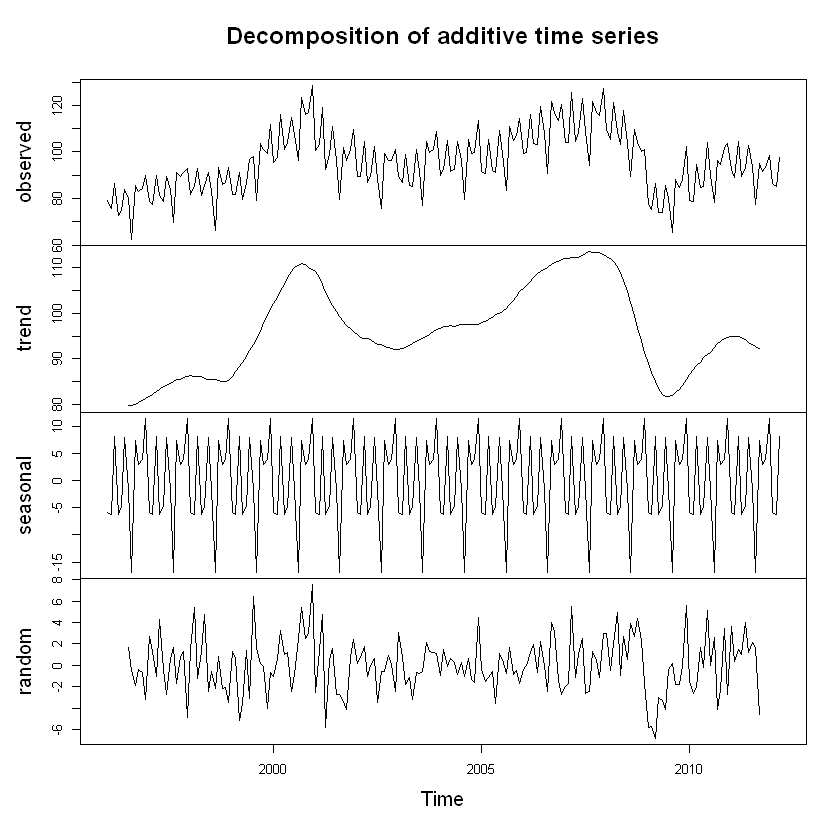

In [4]:
# 차트 그려보기
plot(elecequip.add)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,NA,NA,NA,NA,NA,NA,79.75042,79.78917,80.00500,80.51375,81.03417,81.43083
1997,81.82958,82.29875,82.84333,83.34333,83.89125,84.30792,84.57458,85.04000,85.50083,85.62333,85.90583,86.26375
1998,86.32292,86.17125,86.12208,86.07000,85.74792,85.58958,85.59583,85.43458,85.21250,85.07167,85.05958,85.34333
1999,86.17625,87.31333,88.27083,89.32000,90.46792,91.76333,93.10542,94.34333,96.05125,97.98958,99.59833,101.06167
2000,102.21458,103.32375,104.86250,106.32792,107.69000,109.11792,110.03750,110.47667,110.81458,110.57750,110.00083,109.63333
2001,109.00875,107.84667,106.27042,104.54667,103.06583,101.63417,100.39250,99.35833,98.17125,97.33292,96.71500,95.95000
2002,95.24417,94.74250,94.46625,94.36750,94.16417,93.58292,93.20667,93.10083,92.77542,92.48542,92.25250,92.03833
2003,92.14708,92.35417,92.61042,92.95083,93.29333,93.83083,94.18667,94.43250,94.91458,95.42167,95.97458,96.41292
2004,96.73042,97.02250,97.17667,97.20000,97.12375,97.25958,97.52292,97.52542,97.47125,97.51667,97.48917,97.62875
2005,97.95125,98.23583,98.61708,99.08125,99.62583,99.96542,100.31375,101.01417,101.84417,102.75750,103.72208,104.64417


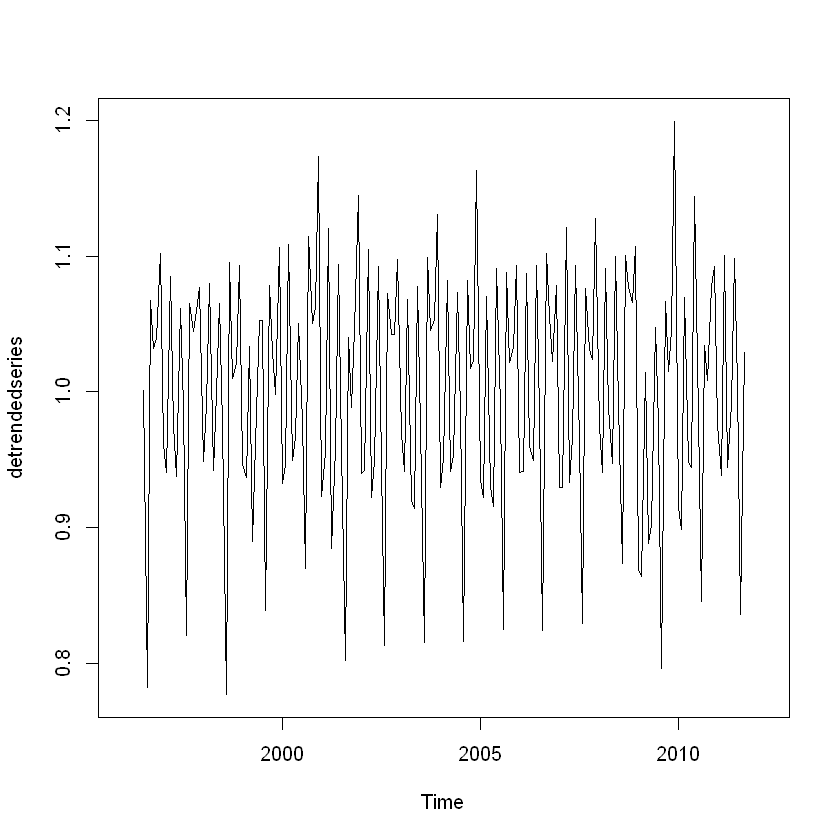

In [5]:
# step2 ~ step4
# 가법 모형 적용
elecequip.mul <- decompose(elecequip, type="multiplicative")

# 추세성분 추정
elecequip.mul$trend

# 추세조정된 계열: y/T 측정
detrendedseries <- elecequip.mul$x / elecequip.mul$trend
plot(detrendedseries)


In [6]:
# step2 ~ step4
# 계절성분 추정
elecequip.mul$seasonal

# 계절성분 주기별로 다 똑같은 값을 갖으니 그 대표값만 출력
elecequip.mul$figure

# 불규칙한 성분 추정
elecequip.mul$random

# 동일한 결과
elecequip.mul$x / (elecequip.mul$trend * elecequip.mul$seasonal)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262
1997,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262
1998,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262
1999,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262
2000,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262
2001,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262
2002,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262
2003,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262
2004,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262
2005,0.9394265,0.9359816,1.0824414,0.9346041,0.9503483,1.0823936,0.9846287,0.8229195,1.0758330,1.0313067,1.0409903,1.1191262


[1] 0.9394265 0.9359816 1.0824414 0.9346041 0.9503483 1.0823936 0.9846287
 [8] 0.8229195 1.0758330 1.0313067 1.0409903 1.1191262

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,NA,NA,NA,NA,NA,NA,1.0162427,0.9505017,0.9923085,1.0009108,0.9982718,0.9842932
1997,1.0229876,1.0050615,1.0020847,1.0433540,0.9868812,0.9808848,1.0047486,0.9974126,0.9902742,1.0127524,1.0180354,0.9619844
1998,1.0095687,1.0583388,0.9974029,1.0080633,1.0509215,0.9837911,0.9902692,0.9440191,1.0181684,0.9794269,0.9803921,0.9768614
1999,1.0078283,1.0005669,0.9549127,0.9517382,1.0117936,0.9725742,1.0688932,1.0192310,1.0021763,0.9983444,0.9587108,0.9884991
2000,0.9924697,1.0109697,1.0239851,1.0161560,1.0168745,0.9706327,0.9932985,1.0572699,1.0359175,1.0182453,1.0205240,1.0482215
2001,0.9819765,1.0208783,1.0350208,0.9462720,1.0081835,1.0102886,0.9724901,0.9750023,0.9664267,0.9581582,1.0057670,1.0230009
2002,1.0005041,1.0066845,1.0204962,0.9870034,0.9982259,1.0089488,0.9602942,0.9878027,0.9966852,1.0106853,1.0013124,0.9805586
2003,1.0320520,1.0054164,0.9865794,0.9846645,0.9615258,0.9958460,0.9898759,0.9906017,1.0217188,1.0133219,1.0115244,1.0102113
2004,0.9890932,1.0160633,0.9992580,1.0072265,1.0028018,0.9912309,1.0019384,0.9915823,1.0054091,0.9861828,0.9830982,1.0392747
2005,0.9960008,0.9849160,0.9885035,0.9954456,0.9634635,1.0077455,1.0049427,1.0028087,1.0112504,0.9903326,0.9916305,0.9768591


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1996,NA,NA,NA,NA,NA,NA,1.0162427,0.9505017,0.9923085,1.0009108,0.9982718,0.9842932
1997,1.0229876,1.0050615,1.0020847,1.0433540,0.9868812,0.9808848,1.0047486,0.9974126,0.9902742,1.0127524,1.0180354,0.9619844
1998,1.0095687,1.0583388,0.9974029,1.0080633,1.0509215,0.9837911,0.9902692,0.9440191,1.0181684,0.9794269,0.9803921,0.9768614
1999,1.0078283,1.0005669,0.9549127,0.9517382,1.0117936,0.9725742,1.0688932,1.0192310,1.0021763,0.9983444,0.9587108,0.9884991
2000,0.9924697,1.0109697,1.0239851,1.0161560,1.0168745,0.9706327,0.9932985,1.0572699,1.0359175,1.0182453,1.0205240,1.0482215
2001,0.9819765,1.0208783,1.0350208,0.9462720,1.0081835,1.0102886,0.9724901,0.9750023,0.9664267,0.9581582,1.0057670,1.0230009
2002,1.0005041,1.0066845,1.0204962,0.9870034,0.9982259,1.0089488,0.9602942,0.9878027,0.9966852,1.0106853,1.0013124,0.9805586
2003,1.0320520,1.0054164,0.9865794,0.9846645,0.9615258,0.9958460,0.9898759,0.9906017,1.0217188,1.0133219,1.0115244,1.0102113
2004,0.9890932,1.0160633,0.9992580,1.0072265,1.0028018,0.9912309,1.0019384,0.9915823,1.0054091,0.9861828,0.9830982,1.0392747
2005,0.9960008,0.9849160,0.9885035,0.9954456,0.9634635,1.0077455,1.0049427,1.0028087,1.0112504,0.9903326,0.9916305,0.9768591


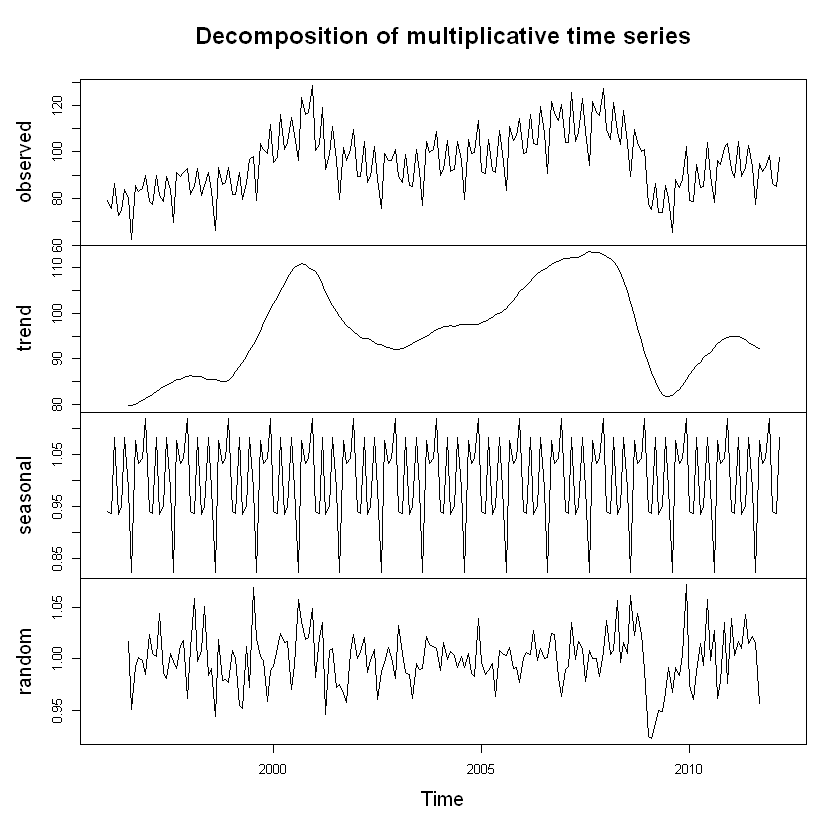

In [7]:
# 차트 그려보기
plot(elecequip.mul)